In [46]:
import pandas as pd
from json import loads
import seaborn as sns
from matplotlib import pyplot as plt

In [47]:
plt.rcParams['figure.figsize'] = (10, 6) 
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.grid'] = True

In [48]:
df_l_clean = pd.read_csv("labeled_ner_emo.csv")
df_l_clean["named_entities"] = df_l_clean["named_entities_json"].apply(
    loads
)
df_l_clean["emotion"] = df_l_clean["emotion_json"].apply(
    loads
)
df_l_clean

,replyDate,reply,telegramChannel,Label,named_entities,named_entities_json,emotion,emotion_json
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2,"[{'entity_group': 'PER', 'score': 0.5087380409...","[{""entity_group"": ""PER"", ""score"": 0.5087380409...","[{'label': 'neutral', 'score': 0.6424934267997...","[{""label"": ""neutral"", ""score"": 0.6424934267997..."
1,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2,"[{'entity_group': 'MISC', 'score': 0.748939037...","[{""entity_group"": ""MISC"", ""score"": 0.748939037...","[{'label': 'neutral', 'score': 0.6776106953620...","[{""label"": ""neutral"", ""score"": 0.6776106953620..."
2,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2,"[{'entity_group': 'PER', 'score': 0.8127702474...","[{""entity_group"": ""PER"", ""score"": 0.8127702474...","[{'label': 'anger', 'score': 0.945322871208190...","[{""label"": ""anger"", ""score"": 0.945322871208190..."
3,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2,"[{'entity_group': 'LOC', 'score': 0.9989275336...","[{""entity_group"": ""LOC"", ""score"": 0.9989275336...","[{'label': 'neutral', 'score': 0.7125468254089...","[{""label"": ""neutral"", ""score"": 0.7125468254089..."
4,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2,"[{'entity_group': 'LOC', 'score': 0.4548235535...","[{""entity_group"": ""LOC"", ""score"": 0.4548235535...","[{'label': 'neutral', 'score': 0.8668019175529...","[{""label"": ""neutral"", ""score"": 0.8668019175529..."
...,...,...,...,...,...,...,...,...
15055,1630362047,Hmmm. I’m not believing this anymore. Wtf. ARR...,AnalyzingAmerica.json,1,"[{'entity_group': 'MISC', 'score': 0.462011128...","[{""entity_group"": ""MISC"", ""score"": 0.462011128...","[{'label': 'anger', 'score': 0.526343822479248...","[{""label"": ""anger"", ""score"": 0.526343822479248..."
15056,1678747240,Indian gonna scalp her,ResisttheMainstream.json,2,"[{'entity_group': 'MISC', 'score': 0.775369107...","[{""entity_group"": ""MISC"", ""score"": 0.775369107...","[{'label': 'anger', 'score': 0.703433156013488...","[{""label"": ""anger"", ""score"": 0.703433156013488..."
15057,1696303318,Why didn’t capital police arrest him! They wou...,ResisttheMainstream.json,1,[],[],"[{'label': 'anger', 'score': 0.794587194919586...","[{""label"": ""anger"", ""score"": 0.794587194919586..."
15058,1662850264,Pup play but they're seal pups and I club them,RiotDogs.json,0,[],[],"[{'label': 'neutral', 'score': 0.8287609219551...","[{""label"": ""neutral"", ""score"": 0.8287609219551..."


# Extract emotion objects into seperate features

In [49]:
EMOTION_LABELS = ("anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise")

# Pre-allocate space for columns
df_l_clean.loc[:, EMOTION_LABELS] = 0.0

def emotion_unpack(row):
    emotion_list = row["emotion"]

    for emotion_dict in emotion_list:
        label = emotion_dict["label"]
        score = emotion_dict["score"]

        row[label] = score

    return row

df_l_clean = df_l_clean.apply(
    emotion_unpack,
    axis=1
)
df_l_clean = df_l_clean.drop(labels = ["emotion", "emotion_json"], axis=1)
df_l_clean

,replyDate,reply,telegramChannel,Label,named_entities,named_entities_json,anger,disgust,fear,joy,neutral,sadness,surprise
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2,"[{'entity_group': 'PER', 'score': 0.5087380409...","[{""entity_group"": ""PER"", ""score"": 0.5087380409...",0.125049,0.010610,0.021007,0.007104,0.642493,0.043467,0.150270
1,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2,"[{'entity_group': 'MISC', 'score': 0.748939037...","[{""entity_group"": ""MISC"", ""score"": 0.748939037...",0.059286,0.032058,0.050663,0.003283,0.677611,0.147585,0.029514
2,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2,"[{'entity_group': 'PER', 'score': 0.8127702474...","[{""entity_group"": ""PER"", ""score"": 0.8127702474...",0.945323,0.006820,0.030570,0.002117,0.004961,0.007536,0.002674
3,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2,"[{'entity_group': 'LOC', 'score': 0.9989275336...","[{""entity_group"": ""LOC"", ""score"": 0.9989275336...",0.076145,0.154953,0.008257,0.002443,0.712547,0.025815,0.019841
4,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2,"[{'entity_group': 'LOC', 'score': 0.4548235535...","[{""entity_group"": ""LOC"", ""score"": 0.4548235535...",0.079072,0.024400,0.010068,0.006892,0.866802,0.006305,0.006460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1630362047,Hmmm. I’m not believing this anymore. Wtf. ARR...,AnalyzingAmerica.json,1,"[{'entity_group': 'MISC', 'score': 0.462011128...","[{""entity_group"": ""MISC"", ""score"": 0.462011128...",0.526344,0.307689,0.017883,0.002801,0.020235,0.018502,0.106546
15056,1678747240,Indian gonna scalp her,ResisttheMainstream.json,2,"[{'entity_group': 'MISC', 'score': 0.775369107...","[{""entity_group"": ""MISC"", ""score"": 0.775369107...",0.703433,0.107107,0.051600,0.002427,0.088895,0.034580,0.011959
15057,1696303318,Why didn’t capital police arrest him! They wou...,ResisttheMainstream.json,1,[],[],0.794587,0.091528,0.010920,0.001076,0.033544,0.022179,0.046167
15058,1662850264,Pup play but they're seal pups and I club them,RiotDogs.json,0,[],[],0.044165,0.055992,0.004021,0.021880,0.828761,0.026001,0.019179


Text(0, 0.5, 'score')

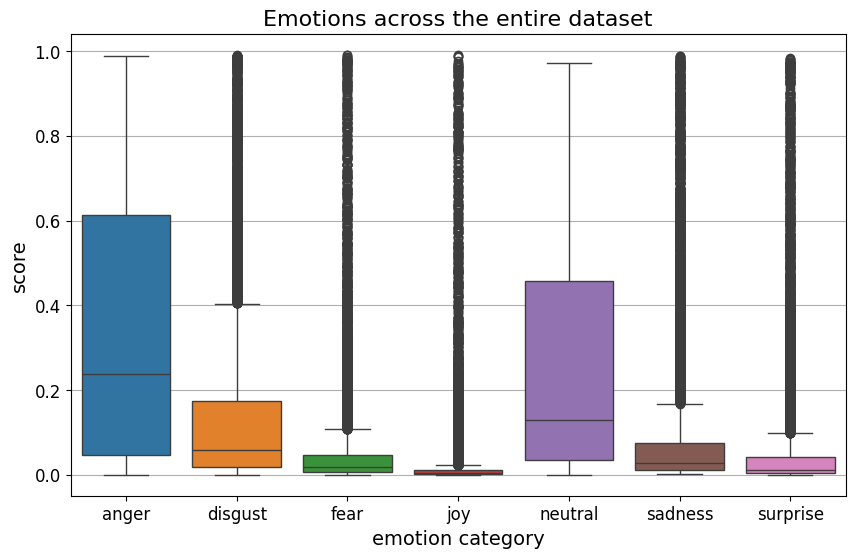

In [50]:
sns.boxplot(df_l_clean.loc[:, EMOTION_LABELS])
plt.title(f"Emotions across the entire dataset")
plt.xlabel(f"emotion category")
plt.ylabel(f"score")

In [51]:
threat_0 = df_l_clean[df_l_clean["Label"] == 0]
threat_1 = df_l_clean[df_l_clean["Label"] == 1]
threat_2 = df_l_clean[df_l_clean["Label"] == 2]

Text(0, 0.5, 'score')

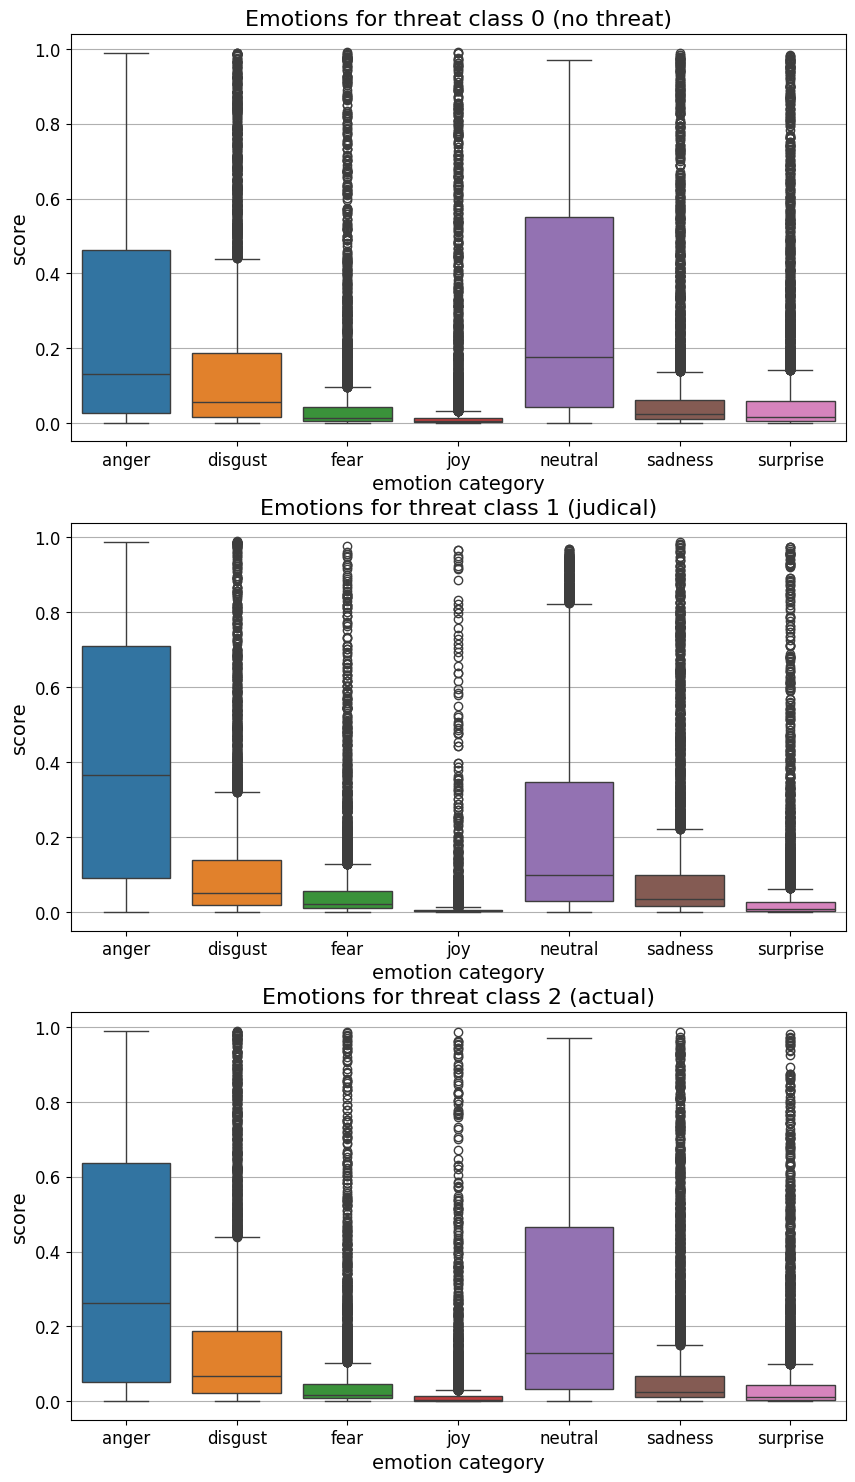

In [52]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

sns.boxplot(threat_0.loc[:, EMOTION_LABELS], ax=ax[0])
ax[0].set_title(f"Emotions for threat class 0 (no threat)")
ax[0].set_xlabel(f"emotion category")
ax[0].set_ylabel(f"score")

sns.boxplot(threat_1.loc[:, EMOTION_LABELS], ax=ax[1])
ax[1].set_title(f"Emotions for threat class 1 (judical)")
ax[1].set_xlabel(f"emotion category")
ax[1].set_ylabel(f"score")

sns.boxplot(threat_2.loc[:, EMOTION_LABELS], ax=ax[2])
ax[2].set_title(f"Emotions for threat class 2 (actual)")
ax[2].set_xlabel(f"emotion category")
ax[2].set_ylabel(f"score")

In [71]:
from scipy.stats import kruskal # https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_test

In [ ]:
emotion_significance = []

for feature in EMOTION_LABELS:
    # Group the continuous variable by the categorical variable
    groups = [group[feature].values for _, group in df_l_clean.groupby("Label")]

    h_stat, p_value = kruskal(*groups)

    emotion_significance.append({
        "feature": feature,
        "H_statistic": h_stat,
        "p_value": p_value,
        "is_significant": p_value < 0.05
    })

In [81]:
for feature_dict in emotion_significance:
    print(f"Feature: {feature_dict["feature"].ljust(8, ' ')}",
          f"has H-statistic of: {feature_dict["H_statistic"]:.6}",
          f"with a p value of {feature_dict["p_value"]:.6}",
          f"and is {"" if feature_dict["is_significant"] else "not "}significant"
    )

Feature: anger    has H-statistic of: 611.418 with a p value of 1.7071e-133 and is significant
Feature: disgust  has H-statistic of: 46.9243 with a p value of 6.46433e-11 and is significant
Feature: fear     has H-statistic of: 255.416 with a p value of 3.44495e-56 and is significant
Feature: joy      has H-statistic of: 394.657 with a p value of 2.00089e-86 and is significant
Feature: neutral  has H-statistic of: 168.827 with a p value of 2.18652e-37 and is significant
Feature: sadness  has H-statistic of: 219.933 with a p value of 1.74616e-48 and is significant
Feature: surprise has H-statistic of: 234.461 with a p value of 1.22279e-51 and is significant


# Quantitative NER features

In [58]:
NER_CLASSES = ("PER", "LOC", "MISC", "ORG")

# Pre-allocate space for columns
df_l_clean.loc[:, NER_CLASSES] = 0

def entities_unpack(row):
    entities_list = row["named_entities"]

    for entity_dict in entities_list:
        label = entity_dict["entity_group"]
        row[label] += 1

    return row

df_l_clean = df_l_clean.apply(
    entities_unpack,
    axis=1
)
df_l_clean = df_l_clean.drop(labels = ["named_entities", "named_entities_json"], axis=1)
df_l_clean

,replyDate,reply,telegramChannel,Label,anger,disgust,fear,joy,neutral,sadness,surprise,PER,LOC,MISC,ORG
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2,0.125049,0.010610,0.021007,0.007104,0.642493,0.043467,0.150270,2,0,0,0
1,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2,0.059286,0.032058,0.050663,0.003283,0.677611,0.147585,0.029514,0,0,1,0
2,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2,0.945323,0.006820,0.030570,0.002117,0.004961,0.007536,0.002674,1,0,0,0
3,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2,0.076145,0.154953,0.008257,0.002443,0.712547,0.025815,0.019841,0,1,0,0
4,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2,0.079072,0.024400,0.010068,0.006892,0.866802,0.006305,0.006460,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1630362047,Hmmm. I’m not believing this anymore. Wtf. ARR...,AnalyzingAmerica.json,1,0.526344,0.307689,0.017883,0.002801,0.020235,0.018502,0.106546,0,0,1,0
15056,1678747240,Indian gonna scalp her,ResisttheMainstream.json,2,0.703433,0.107107,0.051600,0.002427,0.088895,0.034580,0.011959,0,0,1,0
15057,1696303318,Why didn’t capital police arrest him! They wou...,ResisttheMainstream.json,1,0.794587,0.091528,0.010920,0.001076,0.033544,0.022179,0.046167,0,0,0,0
15058,1662850264,Pup play but they're seal pups and I club them,RiotDogs.json,0,0.044165,0.055992,0.004021,0.021880,0.828761,0.026001,0.019179,0,0,0,0


In [61]:
df_l_clean.loc[:, NER_CLASSES].sum()

PER     4833
LOC     1961
MISC    6006
ORG     2313
dtype: int64

Text(0, 0.5, 'count')

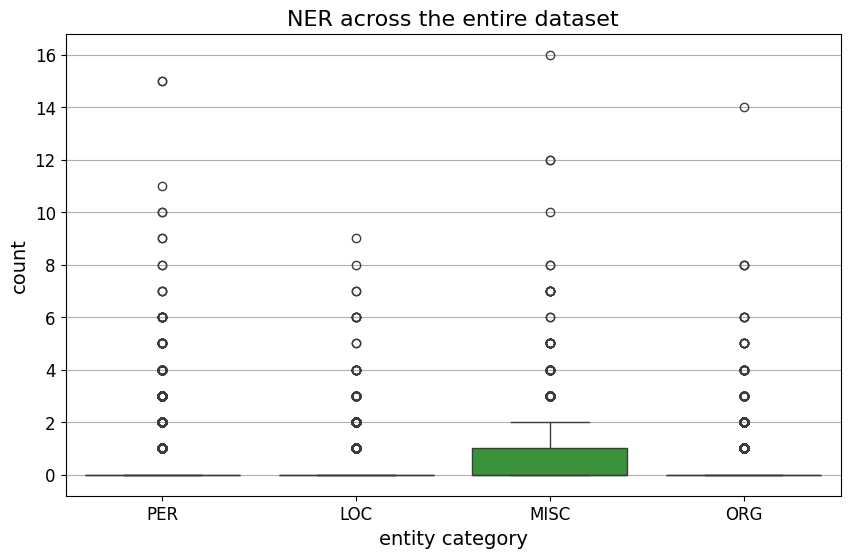

In [63]:
sns.boxplot(df_l_clean.loc[:, NER_CLASSES])
plt.title(f"NER across the entire dataset")
plt.xlabel(f"entity category")
plt.ylabel(f"count")

In [65]:
threat_0 = df_l_clean[df_l_clean["Label"] == 0]
threat_1 = df_l_clean[df_l_clean["Label"] == 1]
threat_2 = df_l_clean[df_l_clean["Label"] == 2]

Text(0, 0.5, 'score')

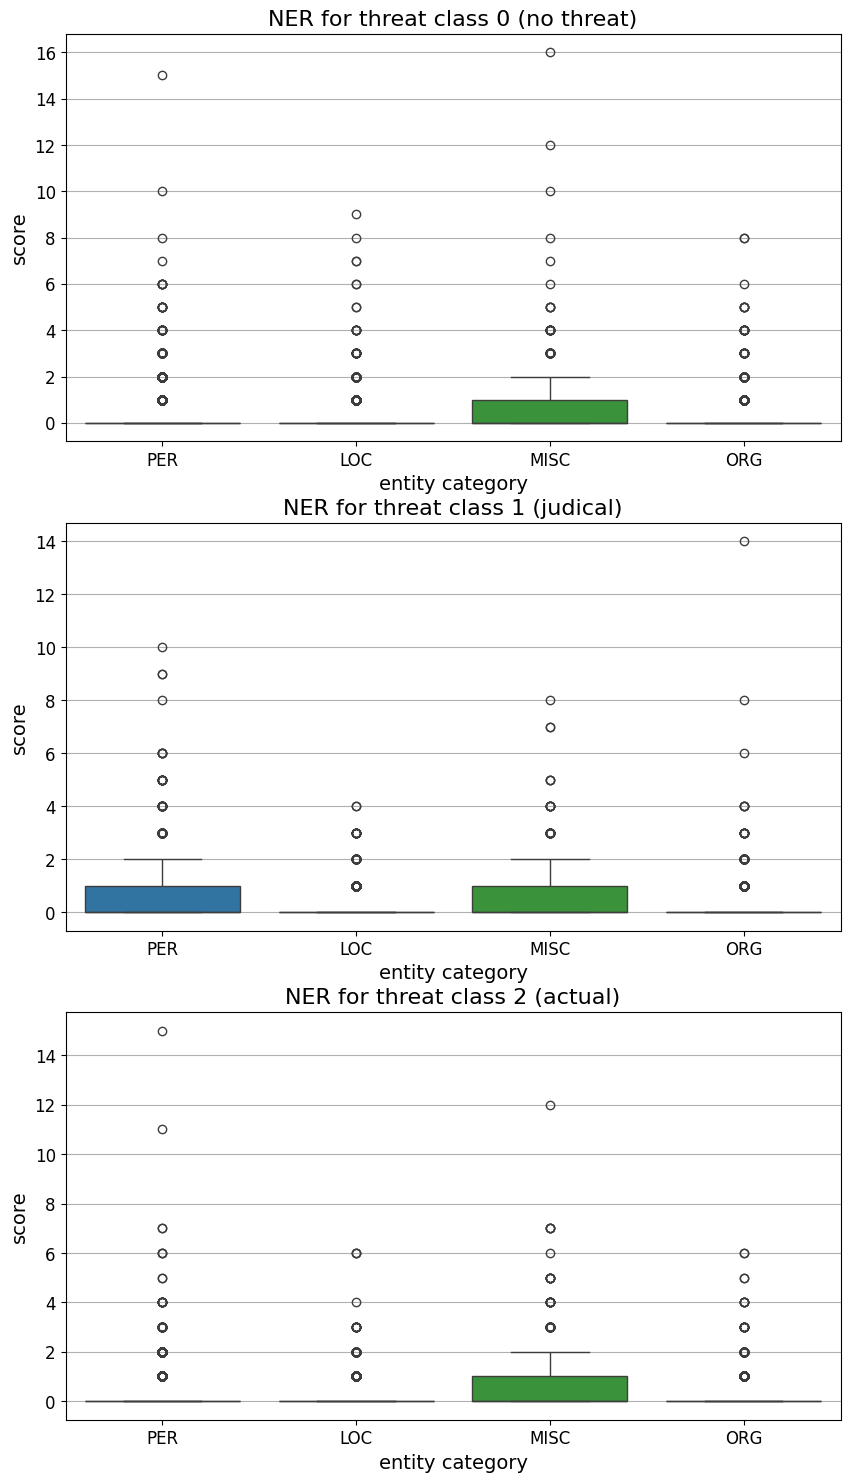

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

sns.boxplot(threat_0.loc[:, NER_CLASSES], ax=ax[0])
ax[0].set_title(f"NER for threat class 0 (no threat)")
ax[0].set_xlabel(f"entity category")
ax[0].set_ylabel(f"score")

sns.boxplot(threat_1.loc[:, NER_CLASSES], ax=ax[1])
ax[1].set_title(f"NER for threat class 1 (judical)")
ax[1].set_xlabel(f"entity category")
ax[1].set_ylabel(f"score")

sns.boxplot(threat_2.loc[:, NER_CLASSES], ax=ax[2])
ax[2].set_title(f"NER for threat class 2 (actual)")
ax[2].set_xlabel(f"entity category")
ax[2].set_ylabel(f"score")

In [ ]:
ner_count_significance = []

for feature in NER_CLASSES:
    # Group the continuous variable by the categorical variable
    groups = [group[feature].values for _, group in df_l_clean.groupby("Label")]

    h_stat, p_value = kruskal(*groups)

    ner_count_significance.append({
        "feature": feature,
        "H_statistic": h_stat,
        "p_value": p_value,
        "is_significant": p_value < 0.05
    })

In [79]:
for feature_dict in ner_count_significance:
    print(f"Feature: {feature_dict["feature"].ljust(4, ' ')}",
          f"has H-statistic of: {feature_dict["H_statistic"]:.6}",
          f"with a p value of {feature_dict["p_value"]:.6}",
          f"and is {"" if feature_dict["is_significant"] else "not "}significant"
    )

Feature: PER  has H-statistic of: 99.5068 with a p value of 2.4681e-22 and is significant
Feature: LOC  has H-statistic of: 39.7093 with a p value of 2.38356e-09 and is significant
Feature: MISC has H-statistic of: 153.475 with a p value of 4.71297e-34 and is significant
Feature: ORG  has H-statistic of: 16.1065 with a p value of 0.000318062 and is significant


# Message length features

In [84]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [83]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\artur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\artur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [85]:
MESSAGE_LENGTH_COLUMNS = ("char_len", "token_len")

# Pre-allocate space for columns
df_l_clean.loc[:, MESSAGE_LENGTH_COLUMNS] = 0

ENGLISH_STOPWORDS = set(stopwords.words("english"))

def tokenize_message(message):
    # Remove links, numbers, and punctuation
    message = re.sub(r'http\S+|www\S+|https\S+', '', message)
    message = re.sub(r'\d+', '', message)
    message = re.sub(r'[^\w\s]', '', message)

    tokens = word_tokenize(message.lower())
    tokens = [word for word in tokens if word not in ENGLISH_STOPWORDS and word.strip()]

    return tokens

def message_unpack(row):
    text = row["reply"]
    row["char_len"] = len(text)
    row["token_len"] = len(tokenize_message(text))

    return row

df_l_clean = df_l_clean.apply(
    message_unpack,
    axis=1
)
df_l_clean

,replyDate,reply,telegramChannel,Label,anger,disgust,fear,joy,neutral,sadness,surprise,PER,LOC,MISC,ORG,char_len,token_len
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2,0.125049,0.010610,0.021007,0.007104,0.642493,0.043467,0.150270,2,0,0,0,55,5
1,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2,0.059286,0.032058,0.050663,0.003283,0.677611,0.147585,0.029514,0,0,1,0,48,4
2,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2,0.945323,0.006820,0.030570,0.002117,0.004961,0.007536,0.002674,1,0,0,0,56,8
3,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2,0.076145,0.154953,0.008257,0.002443,0.712547,0.025815,0.019841,0,1,0,0,156,17
4,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2,0.079072,0.024400,0.010068,0.006892,0.866802,0.006305,0.006460,0,1,0,0,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1630362047,Hmmm. I’m not believing this anymore. Wtf. ARR...,AnalyzingAmerica.json,1,0.526344,0.307689,0.017883,0.002801,0.020235,0.018502,0.106546,0,0,1,0,62,7
15056,1678747240,Indian gonna scalp her,ResisttheMainstream.json,2,0.703433,0.107107,0.051600,0.002427,0.088895,0.034580,0.011959,0,0,1,0,22,4
15057,1696303318,Why didn’t capital police arrest him! They wou...,ResisttheMainstream.json,1,0.794587,0.091528,0.010920,0.001076,0.033544,0.022179,0.046167,0,0,0,0,98,10
15058,1662850264,Pup play but they're seal pups and I club them,RiotDogs.json,0,0.044165,0.055992,0.004021,0.021880,0.828761,0.026001,0.019179,0,0,0,0,46,6


Text(0, 0.5, 'length')

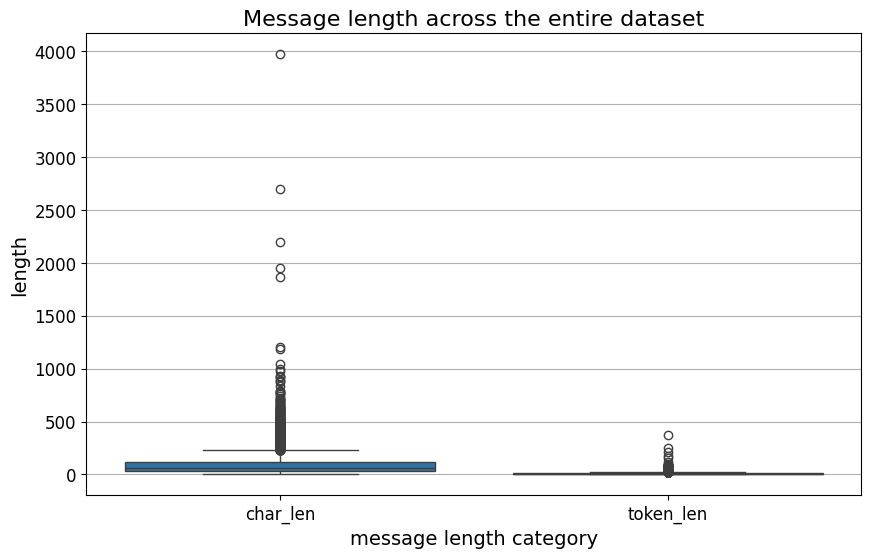

In [86]:
sns.boxplot(df_l_clean.loc[:, MESSAGE_LENGTH_COLUMNS])
plt.title(f"Message length across the entire dataset")
plt.xlabel(f"message length category")
plt.ylabel(f"length")

In [87]:
threat_0 = df_l_clean[df_l_clean["Label"] == 0]
threat_1 = df_l_clean[df_l_clean["Label"] == 1]
threat_2 = df_l_clean[df_l_clean["Label"] == 2]

Text(0, 0.5, 'length')

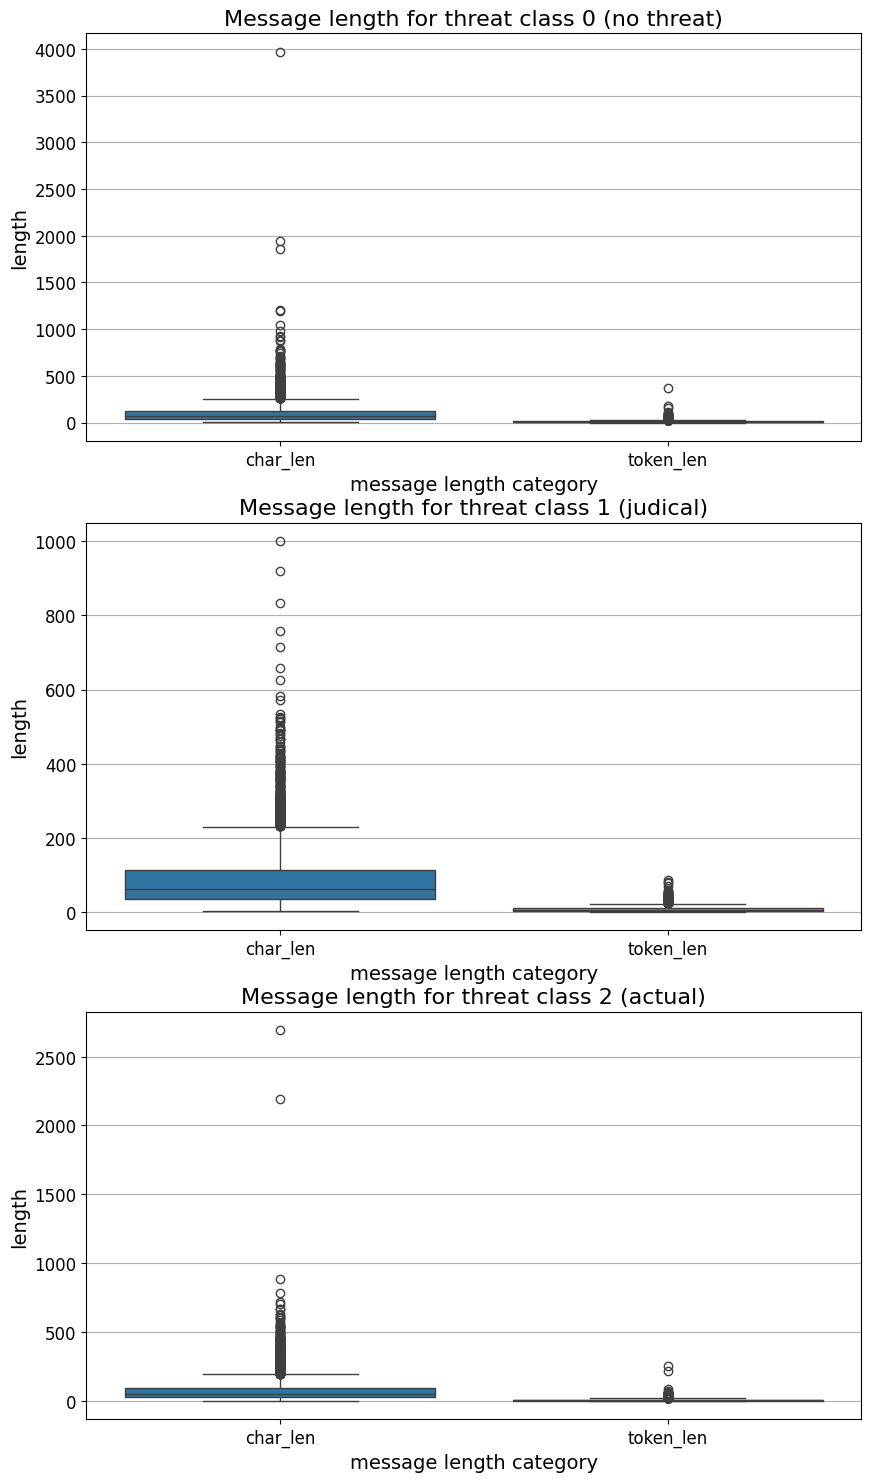

In [88]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

sns.boxplot(threat_0.loc[:, MESSAGE_LENGTH_COLUMNS], ax=ax[0])
ax[0].set_title(f"Message length for threat class 0 (no threat)")
ax[0].set_xlabel(f"message length category")
ax[0].set_ylabel(f"length")

sns.boxplot(threat_1.loc[:, MESSAGE_LENGTH_COLUMNS], ax=ax[1])
ax[1].set_title(f"Message length for threat class 1 (judical)")
ax[1].set_xlabel(f"message length category")
ax[1].set_ylabel(f"length")

sns.boxplot(threat_2.loc[:, MESSAGE_LENGTH_COLUMNS], ax=ax[2])
ax[2].set_title(f"Message length for threat class 2 (actual)")
ax[2].set_xlabel(f"message length category")
ax[2].set_ylabel(f"length")

In [ ]:
mesage_length_significance = []

for feature in MESSAGE_LENGTH_COLUMNS:
    # Group the continuous variable by the categorical variable
    groups = [group[feature].values for _, group in df_l_clean.groupby("Label")]

    h_stat, p_value = kruskal(*groups)

    mesage_length_significance.append({
        "feature": feature,
        "H_statistic": h_stat,
        "p_value": p_value,
        "is_significant": p_value < 0.05
    })

In [90]:
for feature_dict in mesage_length_significance:
    print(f"Feature: {feature_dict["feature"].ljust(4, ' ')}",
          f"has H-statistic of: {feature_dict["H_statistic"]:.6}",
          f"with a p value of {feature_dict["p_value"]:.6}",
          f"and is {"" if feature_dict["is_significant"] else "not "}significant"
    )

Feature: char_len has H-statistic of: 234.556 with a p value of 1.16637e-51 and is significant
Feature: token_len has H-statistic of: 202.216 with a p value of 1.22846e-44 and is significant


# Emoji use feature

In [91]:
import emoji

In [92]:
EMOJI_COL = "has_emoji"

def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

def message_emoji_unpack(row):
    text = row["reply"]
    row[EMOJI_COL] = contains_emoji(text)

    return row

df_l_clean = df_l_clean.apply(
    message_emoji_unpack,
    axis=1
)
df_l_clean

,replyDate,reply,telegramChannel,Label,anger,disgust,fear,joy,neutral,sadness,surprise,PER,LOC,MISC,ORG,char_len,token_len,has_emoji
0,1687098753,And HANG SCHIFF AND NADLER PELOSI AND ALL THE...,TrumpSupportersChannel.json,2,0.125049,0.010610,0.021007,0.007104,0.642493,0.043467,0.150270,2,0,0,0,55,5,False
1,1698117741,Can we please get to the EXECUTIONS ALREADY 🖕🏽💀💩,ResisttheMainstream.json,2,0.059286,0.032058,0.050663,0.003283,0.677611,0.147585,0.029514,0,0,1,0,48,4,True
2,1684179732,Can't trust Musk as far u can shoot that fucki...,ResisttheMainstream.json,2,0.945323,0.006820,0.030570,0.002117,0.004961,0.007536,0.002674,1,0,0,0,56,8,False
3,1623339801,There are so many criminals in America dishone...,TheTrumpRepublicans.json,2,0.076145,0.154953,0.008257,0.002443,0.712547,0.025815,0.019841,0,1,0,0,156,17,False
4,1685904529,"Traitors all, hang ‘em high",ResisttheMainstream.json,2,0.079072,0.024400,0.010068,0.006892,0.866802,0.006305,0.006460,0,1,0,0,27,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1630362047,Hmmm. I’m not believing this anymore. Wtf. ARR...,AnalyzingAmerica.json,1,0.526344,0.307689,0.017883,0.002801,0.020235,0.018502,0.106546,0,0,1,0,62,7,False
15056,1678747240,Indian gonna scalp her,ResisttheMainstream.json,2,0.703433,0.107107,0.051600,0.002427,0.088895,0.034580,0.011959,0,0,1,0,22,4,False
15057,1696303318,Why didn’t capital police arrest him! They wou...,ResisttheMainstream.json,1,0.794587,0.091528,0.010920,0.001076,0.033544,0.022179,0.046167,0,0,0,0,98,10,False
15058,1662850264,Pup play but they're seal pups and I club them,RiotDogs.json,0,0.044165,0.055992,0.004021,0.021880,0.828761,0.026001,0.019179,0,0,0,0,46,6,False


In [93]:
df_l_clean[EMOJI_COL].value_counts()

has_emoji
False    13909
True      1151
Name: count, dtype: int64

In [94]:
threat_0 = df_l_clean[df_l_clean["Label"] == 0]
threat_1 = df_l_clean[df_l_clean["Label"] == 1]
threat_2 = df_l_clean[df_l_clean["Label"] == 2]

In [95]:
emoji_significance = []

for feature in [EMOJI_COL]:
    # Group the continuous variable by the categorical variable
    groups = [group[feature].values for _, group in df_l_clean.groupby("Label")]

    h_stat, p_value = kruskal(*groups)

    emoji_significance.append({
        "feature": feature,
        "H_statistic": h_stat,
        "p_value": p_value,
        "is_significant": p_value < 0.05
    })

In [96]:
for feature_dict in emoji_significance:
    print(f"Feature: {feature_dict["feature"].ljust(4, ' ')}",
          f"has H-statistic of: {feature_dict["H_statistic"]:.6}",
          f"with a p value of {feature_dict["p_value"]:.6}",
          f"and is {"" if feature_dict["is_significant"] else "not "}significant"
    )

Feature: has_emoji has H-statistic of: 40.0808 with a p value of 1.97955e-09 and is significant


# Final feature importance

In [97]:
all_features = emotion_significance + ner_count_significance + mesage_length_significance + emoji_significance

In [103]:
all_features.sort(key=lambda x: x["H_statistic"], reverse=True)

for feature_dict in all_features:
    print(f"Feature: {feature_dict["feature"].ljust(9, ' ')}",
          f"has H-statistic of: {feature_dict["H_statistic"]:.6}",
          f"with a p value of {feature_dict["p_value"]:.6}",
          f"and is {"" if feature_dict["is_significant"] else "not "}significant"
    )

Feature: anger     has H-statistic of: 611.418 with a p value of 1.7071e-133 and is significant
Feature: joy       has H-statistic of: 394.657 with a p value of 2.00089e-86 and is significant
Feature: fear      has H-statistic of: 255.416 with a p value of 3.44495e-56 and is significant
Feature: char_len  has H-statistic of: 234.556 with a p value of 1.16637e-51 and is significant
Feature: surprise  has H-statistic of: 234.461 with a p value of 1.22279e-51 and is significant
Feature: sadness   has H-statistic of: 219.933 with a p value of 1.74616e-48 and is significant
Feature: token_len has H-statistic of: 202.216 with a p value of 1.22846e-44 and is significant
Feature: neutral   has H-statistic of: 168.827 with a p value of 2.18652e-37 and is significant
Feature: MISC      has H-statistic of: 153.475 with a p value of 4.71297e-34 and is significant
Feature: PER       has H-statistic of: 99.5068 with a p value of 2.4681e-22 and is significant
Feature: disgust   has H-statistic of: 46

<Axes: xlabel='H_statistic', ylabel='feature'>

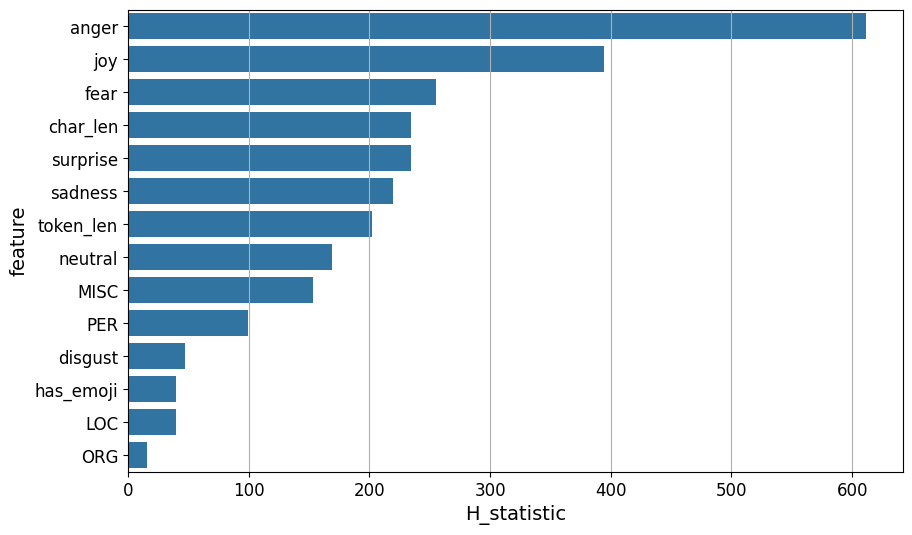

In [104]:
sns.barplot(
    x="H_statistic",
    y="feature",
    data=pd.DataFrame(all_features)
)